#### Importing necessary libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
tf.__version__

'1.13.1'

#### Importing the dataframe

In [6]:
weather_df = pd.read_csv('../input/weatherHistory.csv')

#### Checking the dataframe

In [7]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Doing basic checks on the dataframe

In [8]:
weather_df.columns
weather_df.shape
weather_df.describe()
weather_df.info()
weather_df.isnull().any()
weather_df.isnull().all()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

#### Checking the number of nulls in percentage

In [9]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

#### Now we will try to impute null with the maximum occured values

In [10]:
weather_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [11]:
weather_df.loc[weather_df['Precip Type'].isnull(),'Precip Type']='rain'

In [12]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

#### Doing some exploratory data analysis

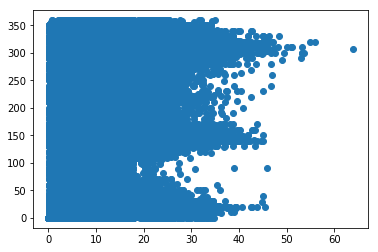

In [13]:
plt.scatter(x = 'Wind Speed (km/h)',y = 'Wind Bearing (degrees)',data=weather_df)

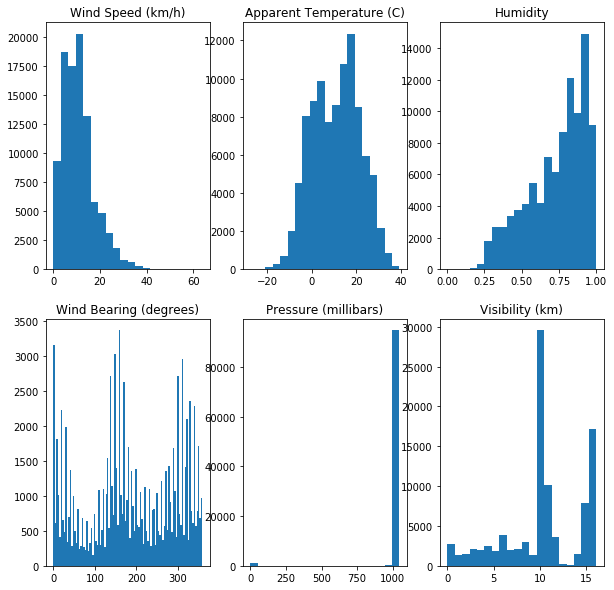

In [14]:
plt.figure(figsize = (10,10))
plt.subplot()
plt.subplot(2,3,1)
plt.title('Wind Speed (km/h)')
plt.hist(x = 'Wind Speed (km/h)',bins =20,data = weather_df)

plt.subplot(2,3,2)
plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)',bins =20,data = weather_df)

plt.subplot(2,3,3)
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = weather_df)

plt.subplot(2,3,4)
plt.title('Wind Bearing (degrees)')
plt.hist(x = 'Wind Bearing (degrees)',bins =100,data = weather_df)

plt.subplot(2,3,5)
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = weather_df)

plt.subplot(2,3,6)
plt.title('Visibility (km)')
plt.hist(x = 'Visibility (km)',bins =20,data = weather_df)


plt.show()

In [15]:
## Creating corellation metrics
weather_corr = weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)].corr()

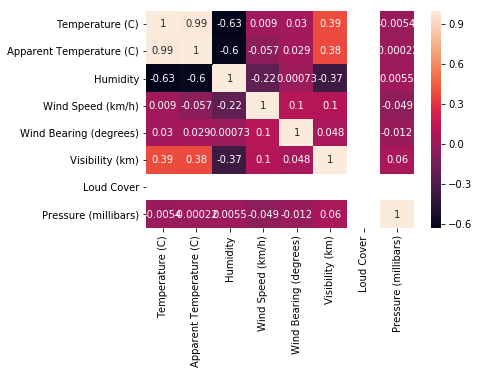

In [16]:
sns.heatmap(weather_corr,annot=True)

In [ ]:
sns.pairplot(weather_df)

In [ ]:
# Imputing binary values in type column 
weather_df.loc[weather_df['Precip Type']=='rain','Precip Type']=1
weather_df.loc[weather_df['Precip Type']=='snow','Precip Type']=0

In [ ]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]

In [ ]:
weather_y = weather_df_num.pop('Temperature (C)')
weather_X = weather_df_num

#### Spliting the data for training and testing purpose

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(weather_X,weather_y,test_size = 0.2,random_state=4)

In [ ]:
train_X.head()

#### Building the model

In [ ]:
model = LinearRegression()
model.fit(train_X,train_y)

In [ ]:
prediction = model.predict(test_X)

In [ ]:
## Calculating the error 
np.mean((prediction-test_y)**2)

In [ ]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction,
             'diff':(test_y-prediction)})